## TensorFlow - Automatic Differentiation and Gradient Tape

In [1]:
import tensorflow as tf

tf.enable_eager_execution()

tfe = tf.contrib.eager # Shorthand for some symbols

#### Derivatives of a function

You can use `tfe.gradients_function(f)` to create a function that computes the derivatives of `f` with respects to its arguments.

In [5]:
from math import pi

def f(x):
    return tf.square(tf.sin(x))

grad_f = tfe.gradients_function(f)

tf.abs(grad_f(pi/2)[0]).numpy()

8.742278e-08

#### Higher-order gradients

You can stack this API.

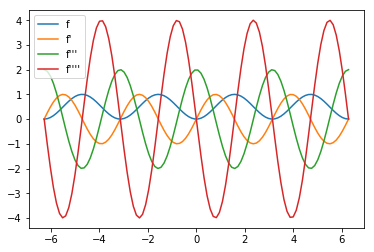

In [8]:
def f(x):
    return tf.square(tf.sin(x))

def grad(f):
    return lambda x: tfe.gradients_function(f)(x)[0]

x = tf.lin_space(-2*pi, 2*pi, 100) # 100 points between -2pi and 2pi

import matplotlib.pyplot as plt

plt.plot(x, f(x), label="f")
plt.plot(x, grad(f)(x), label="f'")
plt.plot(x, grad(grad(f))(x), label="f\'\''")
plt.plot(x, grad(grad(grad(f)))(x), label="f\'\'\''")
plt.legend()
plt.show()

#### Gradient tapes

Every differentiable TensorFlow operation has an associated gradient function. To compute the gradient of a user-defined function, TF first "records" all the operations applied to compute the output of the function. We call this record a *tape*. It then uses that tape and the gradients function associated with each primitive operation to compute the gradients of the user-defined function using *reverse mode differentiation*.

When it's inconvenient to encapsulate computation of interest into a function, you can use `tf.GradientTape` context. All computation inside the context of a `tf.GradientTape` is "recorded".

In [13]:
x = tf.ones((2, 2))

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)   # y = 4
    z = tf.multiply(y, y)  # z = 16
    
dz_dy = t.gradient(z, y)   # Use the same tape to compute the derivative of z with respect to the intermediate value y.
print(dz_dy.numpy())

dz_dx = t.gradient(z, x)   # Use the same tape to compute the derivative of z with respect to the original input tensor x.
print(dz_dx.numpy())

8.0
[[8. 8.]
 [8. 8.]]


#### Higher-order gradients.

Again, you can stack this API.

In [15]:
x = tf.Variable(1.0)

with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x 
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

print(dy_dx.numpy())
print(d2y_dx2.numpy())

3.0
6.0
